In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df3 = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df3 = df3.drop(['index'], axis = 1)

df4 = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)
df5 = pd.read_feather('export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df6 = pd.read_feather('export_WarnowChacko_feather', columns=None, use_threads=True)


In [3]:
df3.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)
df3.head(5)

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
1,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
3,2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
4,2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8


In [4]:
temp_df = pd.concat([df4, df5, df6], axis = 0)
temp_df.head(5)

,new_date,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-08-23 19:00:00,12.49250,16.487500,17.147500,5712.0,-58.250000,93.500000,44.500000,16.487500
1,2021-08-23 19:15:00,12.80250,16.617500,17.025000,5724.0,-58.750000,93.000000,43.750000,16.617500
2,2021-08-23 19:30:00,13.46000,17.500000,18.172857,5739.0,-59.571429,92.142857,45.142857,17.500000
3,2021-08-23 19:45:00,14.12375,18.346250,18.908750,5754.0,-58.625000,91.375000,46.500000,18.346250
4,2021-08-23 20:00:00,14.75000,19.221429,19.768571,5769.0,-57.428571,90.714286,50.000000,19.221429


In [5]:
final_df = df3.merge(temp_df, on='new_date')
final_df.head(5)

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,pressure,humidity,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,992.6,63.6,5.431250,7.600000,8.127500,19254.0,-55.625000,68.0,61.000000,7.600000
1,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,992.6,63.6,5.331429,8.567143,9.045714,1574.0,-65.428571,66.0,65.000000,8.567143
2,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,992.5,62.5,5.922857,8.282857,8.828571,19269.0,-57.142857,68.0,61.285714,8.282857
3,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,992.5,62.5,5.416250,9.157500,9.893750,1589.0,-63.375000,66.0,65.000000,9.157500
4,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,...,993.0,61.5,6.103750,8.436250,9.050000,19284.0,-56.750000,68.0,62.000000,8.436250


In [7]:
df3.corr()

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
co_prescaled,1.000000,0.658231,-0.529999,0.377341,0.006306,0.046460,0.054285,0.055805,0.057833,0.062758,0.050289,-0.351779,-0.779595,0.312841,0.235390
CO2_prescaled,0.658231,1.000000,-0.442190,0.110216,0.263414,-0.148758,-0.080744,-0.035085,-0.004870,0.010514,-0.127398,-0.365647,-0.766456,0.173896,0.212554
no_prescaled,-0.529999,-0.442190,1.000000,0.084578,0.014401,0.204724,0.157325,0.115316,0.085762,0.066059,0.190252,0.938455,0.637481,-0.096258,-0.250214
no2_prescaled,0.377341,0.110216,0.084578,1.000000,0.114406,0.081402,0.062384,0.044075,0.048378,0.046150,0.075433,0.419605,-0.065527,0.263359,-0.223919
o3_prescaled,0.006306,0.263414,0.014401,0.114406,1.000000,-0.221654,-0.192928,-0.175131,-0.108317,-0.078156,-0.217065,0.051771,0.091613,0.126110,-0.682578
pm1_prescale,0.046460,-0.148758,0.204724,0.081402,-0.221654,1.000000,0.943740,0.855074,0.718460,0.648200,0.993371,0.214391,0.238508,-0.094014,0.199738
pm2_5_prescale,0.054285,-0.080744,0.157325,0.062384,-0.192928,0.943740,1.000000,0.977790,0.894604,0.836880,0.975098,0.164670,0.175847,-0.106094,0.179747
pm4_prescale,0.055805,-0.035085,0.115316,0.044075,-0.175131,0.855074,0.977790,1.000000,0.960395,0.916152,0.908764,0.120119,0.126367,-0.113953,0.170862
pm10_prescale,0.057833,-0.004870,0.085762,0.048378,-0.108317,0.718460,0.894604,0.960395,1.000000,0.985543,0.790908,0.094690,0.100068,-0.110418,0.113339
pm_total_prescale,0.062758,0.010514,0.066059,0.046150,-0.078156,0.648200,0.836880,0.916152,0.985543,1.000000,0.724961,0.075972,0.082373,-0.103734,0.093988


<AxesSubplot:>

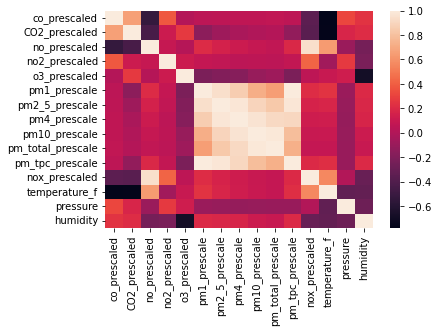

In [6]:
#Correlation heatmap for UIUC Sensor Data
sns.heatmap(df3.corr())

<AxesSubplot:>

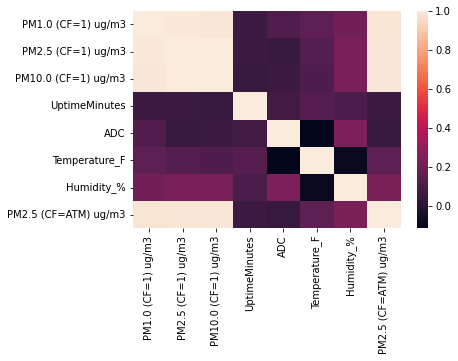

In [7]:
#Correlation heatmap for all Purple Air data
sns.heatmap(temp_df.corr())

<AxesSubplot:>

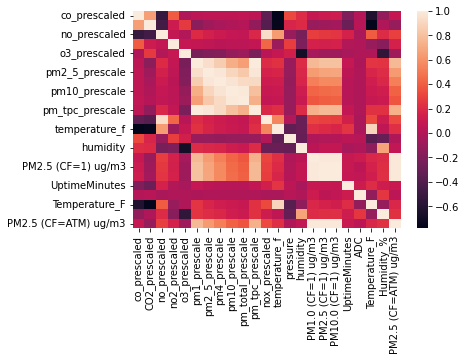

In [8]:
#Correlation heatmap for combined sensor data
sns.heatmap(final_df.corr())

In [8]:
a = final_df.corr()['PM2.5 (CF=1) ug/m3'].sort_values()

In [9]:
b = a.to_frame()

<AxesSubplot:>

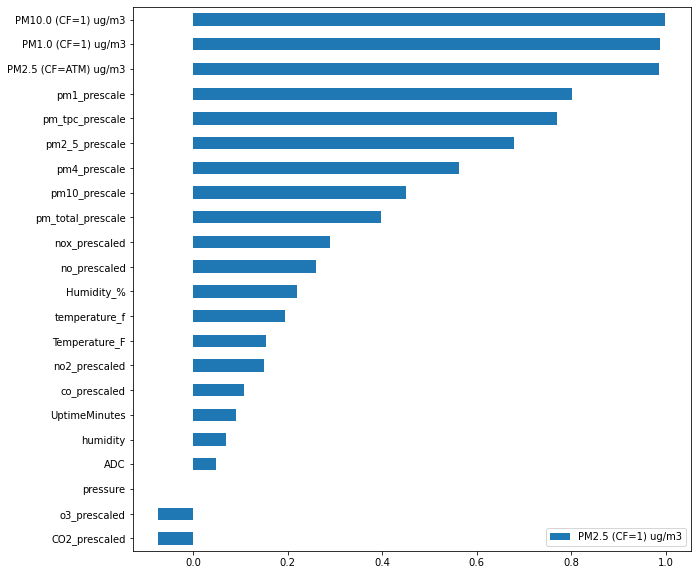

In [10]:
#Correlation of PM2.5 values from Purple air to other recorded variables
fig, ax = plt.subplots(figsize=(10,10))
b.drop('PM2.5 (CF=1) ug/m3').plot.barh(ax=ax)

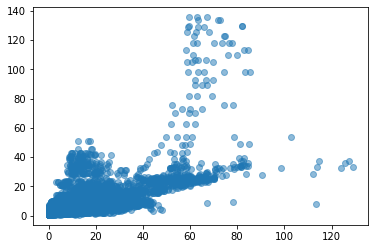

In [11]:
#Scatter plot showing correlation between purple air PC 2.5 values and UIUC sensor PM 2.5 values
plt.scatter(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'], alpha = 0.5)


In [12]:
#Covariance Matrix
np.cov(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'])

array([[113.52972811,          nan],
       [         nan,          nan]])

array([<AxesSubplot:xlabel='new_date'>, <AxesSubplot:xlabel='new_date'>],
      dtype=object)

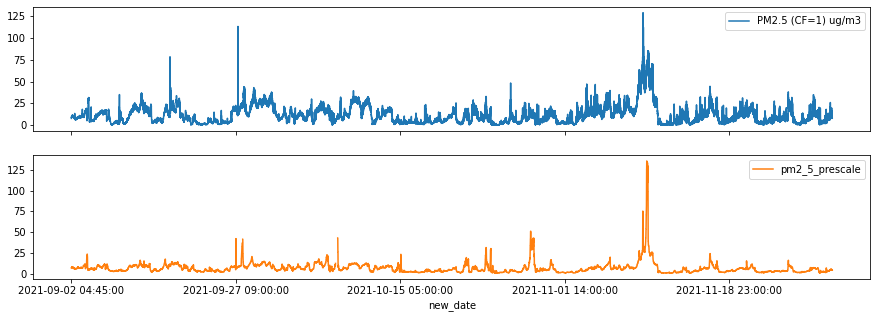

In [13]:
#Variation of PM 2.5 Values from Purple air and UIUC sensor over time
new_df = final_df.set_index('new_date')
new_df[['PM2.5 (CF=1) ug/m3', 'pm2_5_prescale']].plot(subplots = True, figsize = (15,5), legend = True)

In [16]:
import xarray as xr

ds = xr.open_dataset('MERRA2_401.inst1_2d_lfo_Nx.20200930.nc4')
df = ds.to_dataframe()

In [17]:
df.filter(['SPEEDLML'])

SPEEDLML
lon      lat   time                         
-180.000 -90.0 2020-09-30 00:00:00  7.709111
               2020-09-30 01:00:00  7.802152
               2020-09-30 02:00:00  7.942641
               2020-09-30 03:00:00  8.084025
               2020-09-30 04:00:00  8.463020
...                                      ...
 179.375  90.0 2020-09-30 19:00:00  5.487498
               2020-09-30 20:00:00  5.776720
               2020-09-30 21:00:00  6.032176
               2020-09-30 22:00:00  6.108280
               2020-09-30 23:00:00  6.128674

[4990464 rows x 1 columns]

In [18]:
df.shape

(4990464, 5)

In [19]:
df.index.names

FrozenList(['lon', 'lat', 'time'])

In [20]:
df.iloc[0:100]

HLML            PS      QLML  \
lon    lat   time                                                     
-180.0 -90.0 2020-09-30 00:00:00  46.289120  68563.851562  0.000006   
             2020-09-30 01:00:00  46.299355  68572.718750  0.000006   
             2020-09-30 02:00:00  46.329132  68579.039062  0.000006   
             2020-09-30 03:00:00  46.375462  68579.015625  0.000007   
             2020-09-30 04:00:00  46.493122  68606.734375  0.000007   
...                                     ...           ...       ...   
       -88.5 2020-09-30 23:00:00  48.598347  65832.390625  0.000027   
       -88.0 2020-09-30 00:00:00  49.526150  65437.593750  0.000046   
             2020-09-30 01:00:00  49.417629  65437.527344  0.000043   
             2020-09-30 02:00:00  49.342422  65435.421875  0.000042   
             2020-09-30 03:00:00  49.318695  65429.960938  0.000042   

                                   SPEEDLML        TLML  
lon    lat   time                                        
-180.0 -90.0 2020-09-30 00:00:00   7.709111  209.576157  
             2020-09-30 01:00:00   7.802152  209.622345  
             2020-09-30 02:00:00   7.942641  209.757080  
             2020-09-30 03:00:00   8.084025  209.966782  
             2020-09-30 04:00:00   8.463020  210.499039  
...                                     ...         ...  
       -88.5 2020-09-30 23:00:00   7.466978  220.071457  
       -88.0 2020-09-30 00:00:00  10.051929  224.277008  
             2020-09-30 01:00:00  10.949709  223.785858  
             2020-09-30 02:00:00  11.704623  223.445526  
             2020-09-30 03:00:00  12.283512  223.338211  

[100 rows x 5 columns]

In [21]:
df[:5].swaplevel(0, 1, axis=0)

HLML            PS      QLML  SPEEDLML  \
lat   lon    time                                                               
-90.0 -180.0 2020-09-30 00:00:00  46.289120  68563.851562  0.000006  7.709111   
             2020-09-30 01:00:00  46.299355  68572.718750  0.000006  7.802152   
             2020-09-30 02:00:00  46.329132  68579.039062  0.000006  7.942641   
             2020-09-30 03:00:00  46.375462  68579.015625  0.000007  8.084025   
             2020-09-30 04:00:00  46.493122  68606.734375  0.000007  8.463020   

                                        TLML  
lat   lon    time                             
-90.0 -180.0 2020-09-30 00:00:00  209.576157  
             2020-09-30 01:00:00  209.622345  
             2020-09-30 02:00:00  209.757080  
             2020-09-30 03:00:00  209.966782  
             2020-09-30 04:00:00  210.499039

In [22]:
ds

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2020-09-30 ... 2020-09-30T23:00:00
Data variables:
    HLML      (time, lat, lon) float32 46.29 46.29 46.29 ... 59.48 59.48 59.48
    PS        (time, lat, lon) float32 6.856e+04 6.856e+04 ... 1.012e+05
    QLML      (time, lat, lon) float32 6.138e-06 6.138e-06 ... 0.002649 0.002649
    SPEEDLML  (time, lat, lon) float32 7.709 7.709 7.709 ... 6.129 6.129 6.129
    TLML      (time, lat, lon) float32 209.6 209.6 209.6 ... 268.5 268.5 268.5
Attributes: (12/30)
    History:                           Re-processed file generated: Tue Nov  ...
    Comment:                           GMAO filename: d5124_m2_jan10.inst1_2d...
    Filename:                          MERRA2_401.inst1_2d_lfo_Nx.20200930.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/RCMZA6TL70BG
    RangeBeginningDate:                2020-09-30
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-09-30
    RangeEndingTime:                   23:00:00.000000

In [23]:
e = ds.loc[dict(lat="40.0", lon="-87.5")]
f = e.to_dataframe()

In [31]:
wind_df = f.reset_index()
wind_df.head(5)

,time,lon,lat,HLML,PS,QLML,SPEEDLML,TLML
0,2020-09-30 00:00:00,-87.5,40.0,63.858303,98680.835938,0.005445,6.511623,287.754608
1,2020-09-30 01:00:00,-87.5,40.0,63.729668,98675.054688,0.005628,6.950104,287.143219
2,2020-09-30 02:00:00,-87.5,40.0,63.609135,98663.640625,0.005806,7.024870,286.569427
3,2020-09-30 03:00:00,-87.5,40.0,63.495087,98648.664062,0.005930,7.052386,286.034149
4,2020-09-30 04:00:00,-87.5,40.0,63.345947,98590.968750,0.006016,7.213359,285.348022


In [19]:
final_df.dtypes

new_date                 object
co_prescaled            float64
CO2_prescaled           float64
no_prescaled            float64
no2_prescaled           float64
o3_prescaled            float64
pm1_prescale            float64
pm2_5_prescale          float64
pm4_prescale            float64
pm10_prescale           float64
pm_total_prescale       float64
pm_tpc_prescale         float64
nox_prescaled           float64
temperature_f           float64
pressure                float64
humidity                float64
PM1.0 (CF=1) ug/m3      float64
PM2.5 (CF=1) ug/m3      float64
PM10.0 (CF=1) ug/m3     float64
UptimeMinutes           float64
ADC                     float64
Temperature_F           float64
Humidity_%              float64
PM2.5 (CF=ATM) ug/m3    float64
dtype: object

In [20]:
final_df['new_date'] = pd.to_datetime(final_df['new_date'])


In [21]:
final_df.dtypes

new_date                datetime64[ns]
co_prescaled                   float64
CO2_prescaled                  float64
no_prescaled                   float64
no2_prescaled                  float64
o3_prescaled                   float64
pm1_prescale                   float64
pm2_5_prescale                 float64
pm4_prescale                   float64
pm10_prescale                  float64
pm_total_prescale              float64
pm_tpc_prescale                float64
nox_prescaled                  float64
temperature_f                  float64
pressure                       float64
humidity                       float64
PM1.0 (CF=1) ug/m3             float64
PM2.5 (CF=1) ug/m3             float64
PM10.0 (CF=1) ug/m3            float64
UptimeMinutes                  float64
ADC                            float64
Temperature_F                  float64
Humidity_%                     float64
PM2.5 (CF=ATM) ug/m3           float64
dtype: object

In [27]:
wind_df.dtypes

time        datetime64[ns]
lon                float64
lat                float64
HLML               float32
PS                 float32
QLML               float32
SPEEDLML           float32
TLML               float32
dtype: object

<h6> PM 2.5 vs Temperature </h6>

Text(0, 0.5, 'PC 2.5')

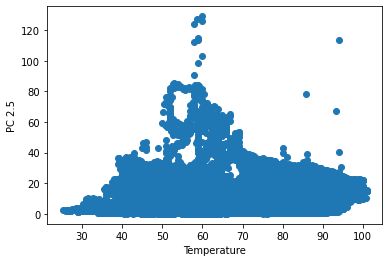

In [14]:
#Test plot showing variation of PC 2.5 with Temperature
plt.scatter(final_df['Temperature_F'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Temperature')
plt.ylabel('PC 2.5')

<h6> PM 2.5 vs Humidity </h6>

Text(0, 0.5, 'PC 2.5')

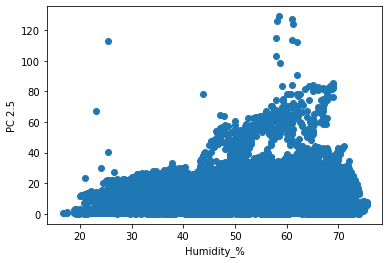

In [15]:
#Scatter plot showing variation of PC2.5 with Humidity
plt.scatter(final_df['Humidity_%'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Humidity_%')
plt.ylabel('PC 2.5')

<h6> PM 2.5 vs Wind Speed </h6>